## Load data

In [1]:
import numpy as np
import tensorflow as tf
from datetime import datetime
directory='.'
train_data_filename = directory+'/train-images-idx3-ubyte.gz'
train_labels_filename = directory+'/train-labels-idx1-ubyte.gz'
test_data_filename = directory+'/t10k-images-idx3-ubyte.gz'
test_labels_filename =directory+'/t10k-labels-idx1-ubyte.gz'
print test_data_filename

./t10k-images-idx3-ubyte.gz


## Inspect data, show the first data point f

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import gzip, binascii, struct, numpy

with gzip.open(test_data_filename) as f:
  for field in ['magic number', 'image count', 'rows', 'columns']:
    line=f.read(4)  #read the first 4 elements in current row
    item0=struct.unpack('>i', line)[0]  #unpack binary data and interpret as integer
    print field, item0
    
  buf = f.read(28 * 28)  #read 28x28=784 rows
  #image is a one-dimensional array of 28x28=784 rows elements
  image = numpy.frombuffer(buf, dtype=numpy.uint8) #data type is integer

  print "image is:"
  print image
  print 'The first 10 pixels of image', image[:10]


magic number 2051
image count 10000
rows 28
columns 28
image is:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 22

## Plot out the data

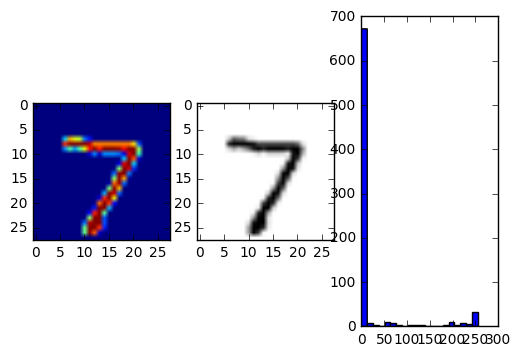

In [3]:
# We'll show the image and its pixel value histogram side-by-side.
plot1= plt.subplot(1, 3, 1) #the plot has 1 row, 2 columns
plot2= plt.subplot(1, 3, 2)
plot3= plt.subplot(1, 3, 3)

plot1.imshow(image.reshape(28, 28));  #reshape the image to 28x28 pixels
plot2.imshow(image.reshape(28, 28), cmap=plt.cm.Greys);  #with grey scale
plot3.hist(image, bins=20, range=[0,255]);

## Show the data label

In [4]:
with gzip.open(test_labels_filename) as f:
  for field in ['magic number', 'label count']:
    line=f.read(4)  #read the first 4 elements in current row
    item0=struct.unpack('>i', line)[0]
    print field, item0

  line= f.read(1) #red the next line
  print 'First label:', struct.unpack('B',line)[0]  #unpacked binary data, and interpret as 'B'=unsigned char

magic number 2049
label count 10000
First label: 7


## Extract data, as 4-d tensor

In [5]:
IMAGE_SIZE = 28
PIXEL_DEPTH = 255

"""
  Extract the images into a 4D tensor [image index, y, x, channels].
  For greyscale MNIST, the number of channels is always 1.
  Values are rescaled from [0, 255] down to [-0.5, 0.5].
==================================================================
"""
def extract_data(filename, num_images):
  print 'Extracting', filename
  with gzip.open(filename) as bytestream:
    # Skip the magic number and dimensions; we know these values.
    bytestream.read(16)
    
    buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
    data = numpy.frombuffer(buf, dtype=numpy.uint8).astype(numpy.float32)
    data = (data - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
    data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, 1)
    return data

train_data = extract_data(train_data_filename, 60000)
test_data = extract_data(test_data_filename, 10000)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz


## Visualize the data

Training data shape (60000, 28, 28, 1)


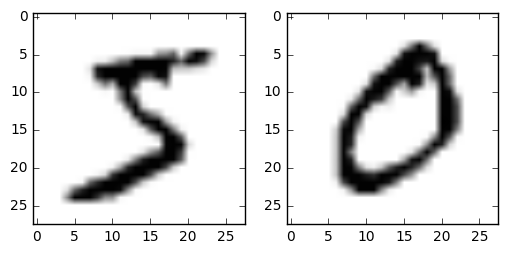

In [6]:
print 'Training data shape', train_data.shape
plot1= plt.subplot(1, 2, 1) #the plot has 1 row, 2 columns
plot2= plt.subplot(1, 2, 2)

image1=train_data[0].reshape(28, 28)
image2=train_data[1].reshape(28, 28)
plot1.imshow(image1, cmap=plt.cm.Greys);
plot2.imshow(image2, cmap=plt.cm.Greys);

In [7]:
NUM_LABELS = 10

def extract_labels(filename, num_images):
  """Extract the labels into a 1-hot matrix [image index, label index]."""
  print 'Extracting', filename
  with gzip.open(filename) as bytestream:
    # Skip the magic number and count; we know these values.
    bytestream.read(8)
    
    buf = bytestream.read(1 * num_images)
    labels = numpy.frombuffer(buf, dtype=numpy.uint8)
  # Convert to dense 1-hot representation.
  return (numpy.arange(NUM_LABELS) == labels[:, None]).astype(numpy.float32)

train_labels = extract_labels(train_labels_filename, 60000)
test_labels = extract_labels(test_labels_filename, 10000)
print 'Training labels shape', train_labels.shape
print 'First label vector', train_labels[0]
print 'Second label vector', train_labels[1]

Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Training labels shape (60000, 10)
First label vector [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Second label vector [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## Split the training data into 2 sets: training , validation

In [8]:
VALIDATION_SIZE = 5000
# VALIDATION_SIZE = 1000

validation_data = train_data[:VALIDATION_SIZE, :, :, :]
validation_labels = train_labels[:VALIDATION_SIZE]
train_data = train_data[VALIDATION_SIZE:, :, :, :]
train_labels = train_labels[VALIDATION_SIZE:]

train_size = train_labels.shape[0]

print 'Validation shape', validation_data.shape
print 'Train size', train_size

Validation shape (5000, 28, 28, 1)
Train size 55000


In [9]:
import tensorflow as tf

BATCH_SIZE = 60 #Each batch is the number of data we feed into NN each time
# We have only one channel in our grayscale images.
NUM_CHANNELS = 1
# The random seed that defines initialization.
SEED = 41

# This is where training samples and labels are fed to the graph.
# These placeholder nodes will be fed a batch of training data at each
# training step, which we'll write once we define the graph structure.
train_data_node = tf.placeholder(tf.float32, shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))
train_labels_node = tf.placeholder(tf.float32,shape=(BATCH_SIZE, NUM_LABELS))

# For the validation and test data, we'll just hold the entire dataset in one constant node.
validation_data_node = tf.constant(validation_data)
test_data_node = tf.constant(test_data)


## Initialize weights

In [10]:
# The variables below hold all the trainable weights. For each, the
# parameter defines how the variables will be initialized.
conv1_weights = tf.Variable(tf.truncated_normal([5, 5, NUM_CHANNELS, 32],  # 9x9 filter, depth 32.
                      stddev=0.1,
                      seed=SEED))
conv1_biases = tf.Variable(tf.zeros([32]))

conv2_weights = tf.Variable(tf.truncated_normal([6, 6, 32, 64],stddev=0.1,seed=SEED))
conv2_biases = tf.Variable(tf.constant(0.1, shape=[64]))

# conv3_weights = tf.Variable(tf.truncated_normal([5, 5, 64, 64],stddev=0.1,seed=SEED))
# conv3_biases = tf.Variable(tf.constant(0.1, shape=[64]))

# fully connected, depth 512.
fc1_weights = tf.Variable(tf.truncated_normal([IMAGE_SIZE / 4 * IMAGE_SIZE / 4 * 64, 512],stddev=0.1,seed=SEED))
fc1_biases = tf.Variable(tf.constant(0.1, shape=[512]))

fc2_weights = tf.Variable(tf.truncated_normal([512, NUM_LABELS],stddev=0.1, seed=SEED))
fc2_biases = tf.Variable(tf.constant(0.1, shape=[NUM_LABELS]))

print 'Done'

Done


In [11]:
def model(data, train=False):
  """The Model definition."""
  # 2D convolution, with 'SAME' padding (i.e. the output feature map has
  # the same size as the input). Note that {strides} is a 4D array whose
  # shape matches the data layout: [image index, y, x, depth].
    # data: 1, 28, 28, 1
    # wt : 5, 5, 1, 32
  # hidden layer 1.
  conv = tf.nn.conv2d(data,
                      conv1_weights,
                      strides=[1, 1, 1, 1],
                      padding='SAME')

  # Bias and rectified linear non-linearity.
  relu = tf.nn.relu(tf.nn.bias_add(conv, conv1_biases))
  
  # Max pooling. The kernel size spec ksize also follows the layout of
  # the data. Here we have a pooling window of 2, and a stride of 2.
  pool = tf.nn.max_pool(relu,
                        ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1],
                        padding='SAME')

  # hidden layer 2.
  conv = tf.nn.conv2d(pool,
                      conv2_weights,
                      strides=[1, 1, 1, 1],
                      padding='SAME')
  relu = tf.nn.relu(tf.nn.bias_add(conv, conv2_biases))

  pool = tf.nn.max_pool(relu,
                        ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1],
                        padding='SAME')

  # hidden layer 3.
  #conv = tf.nn.conv2d(pool,
  #                    conv3_weights,
  #                    strides=[1, 1, 1, 1],
  #                    padding='SAME')
  #relu = tf.nn.relu(tf.nn.bias_add(conv, conv3_biases))
  
  #pool = tf.nn.max_pool(relu,
  #                      ksize=[1, 2, 2, 1],
  #                      strides=[1, 2, 2, 1],
  #                      padding='SAME')
    
  # Reshape the feature map cuboid into a 2D matrix to feed it to the
  # fully connected layers.
  pool_shape = pool.get_shape().as_list()
  print(pool_shape)
  reshape = tf.reshape(
      pool,
      [pool_shape[0], pool_shape[1] * pool_shape[2] * pool_shape[3]])
  
  # Fully connected layer. Note that the '+' operation automatically
  # broadcasts the biases.
  hidden = tf.nn.relu(tf.matmul(reshape, fc1_weights) + fc1_biases)
  
  # Add a 50% dropout during training only. Dropout also scales
  # activations such that no rescaling is needed at evaluation time.
  if train:
    hidden = tf.nn.dropout(hidden, 0.48, seed=SEED)
  return tf.matmul(hidden, fc2_weights) + fc2_biases

print 'Done'

Done


In [12]:
# Training computation: logits + cross-entropy loss.
logits = model(train_data_node, True)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
  logits, train_labels_node))

# L2 regularization for the fully connected parameters.
regularizers = (tf.nn.l2_loss(fc1_weights) + tf.nn.l2_loss(fc1_biases) +
                tf.nn.l2_loss(fc2_weights) + tf.nn.l2_loss(fc2_biases))
# Add the regularization term to the loss.
# loss += 5e-4 * regularizers
loss += 4.9e-4 * regularizers

# Optimizer: set up a variable that's incremented once per batch and
# controls the learning rate decay.
batch = tf.Variable(0)
# Decay once per epoch, using an exponential schedule starting at 0.01.
learning_rate = tf.train.exponential_decay(
  0.0005,                # Base learning rate.
  batch * BATCH_SIZE,  # Current index into the dataset.
  train_size,          # Decay step.
  0.95,                # Decay rate.
  staircase=True)
# Use Adam optimization.
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss,
                                                     global_step=batch)

# Predictions for the minibatch, validation set and test set.
train_prediction = tf.nn.softmax(logits)
# We'll compute them only once in a while by calling their {eval()} method.
validation_prediction = tf.nn.softmax(model(validation_data_node))
test_prediction = tf.nn.softmax(model(test_data_node))

print 'Done'

[60, 7, 7, 64]
[5000, 7, 7, 64]
[10000, 7, 7, 64]
Done


In [13]:
# Create a new interactive session that we'll use in
# subsequent code cells.
s = tf.InteractiveSession()

# Use our newly created session as the default for 
# subsequent operations.
s.as_default()

# Initialize all the variables we defined above.
tf.global_variables_initializer().run()

In [14]:
BATCH_SIZE = 60

# Grab the first BATCH_SIZE examples and labels.
batch_data = train_data[:BATCH_SIZE, :, :, :]
batch_labels = train_labels[:BATCH_SIZE]

# This dictionary maps the batch data (as a numpy array) to the
# node in the graph it should be fed to.
feed_dict = {train_data_node: batch_data,
             train_labels_node: batch_labels}

# Run the graph and fetch some of the nodes.
_, l, lr, predictions = s.run(
  [optimizer, loss, learning_rate, train_prediction],
  feed_dict=feed_dict)

print 'Done'

Done


In [15]:
print predictions[0]

[  6.02223203e-02   1.77267008e-04   3.27722344e-04   1.43857324e-05
   8.98178577e-01   2.81953532e-03   3.16659436e-02   5.53744430e-05
   6.53628260e-03   2.69491170e-06]


In [16]:
# The highest probability in the first entry.
print 'First prediction', numpy.argmax(predictions[0])
print predictions.shape
print 'All predictions', numpy.argmax(predictions, 1)

First prediction 4
(60, 10)
All predictions [4 4 4 0 7 4 7 0 4 8 6 7 8 7 3 5 0 7 3 3 8 3 2 0 8 7 3 9 7 3 6 2 0 5 7 7 0
 7 0 6 6 6 3 6 7 8 5 9 6 8 4 0 8 8 5 5 3 1 3 5]


In [17]:
print 'Batch labels', numpy.argmax(batch_labels, 1)

Batch labels [7 3 4 6 1 8 1 0 9 8 0 3 1 2 7 0 2 9 6 0 1 6 7 1 9 7 6 5 5 8 8 3 4 4 8 7 3
 6 4 6 6 3 8 8 9 9 4 4 0 7 8 1 0 0 1 8 5 7 1 7]


0.116666666667


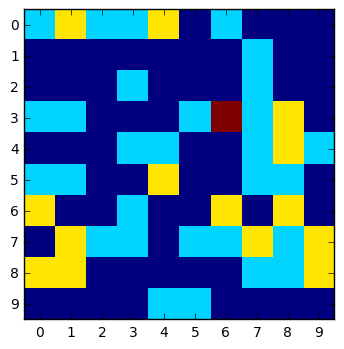

In [18]:
correct = numpy.sum(numpy.argmax(predictions, 1) == numpy.argmax(batch_labels, 1))
total = predictions.shape[0]

print float(correct) / float(total)

confusions = numpy.zeros([10, 10], numpy.float32)
bundled = zip(numpy.argmax(predictions, 1), numpy.argmax(batch_labels, 1))
for predicted, actual in bundled:
  confusions[predicted, actual] += 1

plt.grid(False)
plt.xticks(numpy.arange(NUM_LABELS))
plt.yticks(numpy.arange(NUM_LABELS))
plt.imshow(confusions, cmap=plt.cm.jet, interpolation='nearest')

In [19]:
def error_rate(predictions, labels):
  """Return the error rate and confusions."""
  correct = numpy.sum(numpy.argmax(predictions, 1) == numpy.argmax(labels, 1))
  total = predictions.shape[0]

  error = 100.0 - (100 * float(correct) / float(total))

  confusions = numpy.zeros([10, 10], numpy.float32)
  bundled = zip(numpy.argmax(predictions, 1), numpy.argmax(labels, 1))
  for predicted, actual in bundled:
    confusions[predicted, actual] += 1
    
  return error, confusions

print 'Done'

Done


In [20]:
startTime=datetime.now()
step_list = []
error_rates = []

steps = int(train_size / BATCH_SIZE)
k = 0
for _ in xrange(5):
  for step in xrange(steps):
    # Compute the offset of the current minibatch in the data.
    # Note that we could use better randomization across epochs.
    offset = (step * BATCH_SIZE) % (train_size - BATCH_SIZE)
    batch_data = train_data[offset:(offset + BATCH_SIZE), :, :, :]
    batch_labels = train_labels[offset:(offset + BATCH_SIZE)]
    # This dictionary maps the batch data (as a numpy array) to the
    # node in the graph it should be fed to.
    feed_dict = {train_data_node: batch_data,
                 train_labels_node: batch_labels}
    # Run the graph and fetch some of the nodes.
    _, l, lr, predictions = s.run(
      [optimizer, loss, learning_rate, train_prediction],
      feed_dict=feed_dict)
  
    # Print out the loss periodically.
    if step % 100 == 0:
      error, _ = error_rate(predictions, batch_labels)
      print 'Step %d of %d' % (step, steps)
      print 'Mini-batch loss: %.5f Error: %.5f Learning rate: %.5f' % (l, error, lr)
      base_learning_rate = 0.0005 - (0.00003 * (step/100))
      learning_rate = tf.train.exponential_decay(
                        base_learning_rate,                # Base learning rate.
                        batch * BATCH_SIZE,  # Current index into the dataset.
                        train_size,          # Decay step.
                        0.95,                # Decay rate.
                        staircase=True)
      errorRate = error_rate(validation_prediction.eval(), validation_labels)[0]
      print('Validation error: %.1f%%' % errorRate)
      step_list.append(k)
      k = k + 100
      error_rates.append(errorRate)
print(datetime.now()-startTime)

Step 0 of 916
Mini-batch loss: 9.33840 Error: 83.33333 Learning rate: 0.00050
Validation error: 83.9%
Step 100 of 916
Mini-batch loss: 2.89979 Error: 10.00000 Learning rate: 0.00050
Validation error: 8.0%
Step 200 of 916
Mini-batch loss: 2.59362 Error: 10.00000 Learning rate: 0.00047
Validation error: 4.6%
Step 300 of 916
Mini-batch loss: 2.17550 Error: 1.66667 Learning rate: 0.00044
Validation error: 4.6%
Step 400 of 916
Mini-batch loss: 2.08187 Error: 5.00000 Learning rate: 0.00041
Validation error: 3.2%
Step 500 of 916
Mini-batch loss: 1.90418 Error: 3.33333 Learning rate: 0.00038
Validation error: 2.8%
Step 600 of 916
Mini-batch loss: 1.80536 Error: 5.00000 Learning rate: 0.00035
Validation error: 2.5%
Step 700 of 916
Mini-batch loss: 1.79631 Error: 8.33333 Learning rate: 0.00032
Validation error: 2.6%
Step 800 of 916
Mini-batch loss: 1.59623 Error: 1.66667 Learning rate: 0.00029
Validation error: 2.0%
Step 900 of 916
Mini-batch loss: 1.42582 Error: 0.00000 Learning rate: 0.00026
V

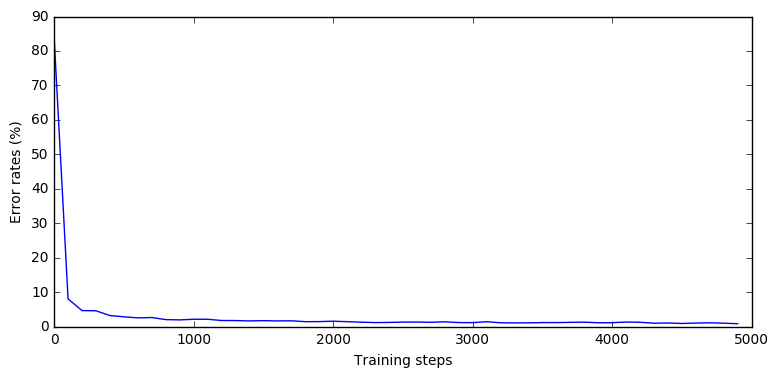

In [21]:
fig, ax2 = plt.subplots(1)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(9, 4)
ax2.plot(step_list, error_rates)
ax2.set_ylabel("Error rates (%)")
ax2.set_xlabel("Training steps")
plt.show()

Test error: 0.91%


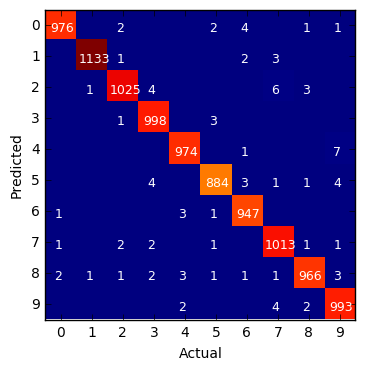

In [22]:
test_error, confusions = error_rate(test_prediction.eval(), test_labels)
print 'Test error: %.2f%%' % test_error

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(numpy.arange(NUM_LABELS))
plt.yticks(numpy.arange(NUM_LABELS))
plt.imshow(confusions, cmap=plt.cm.jet, interpolation='nearest');

for i, cas in enumerate(confusions):
  for j, count in enumerate(cas):
    if count > 0:
      xoff = .07 * len(str(count))
      plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')

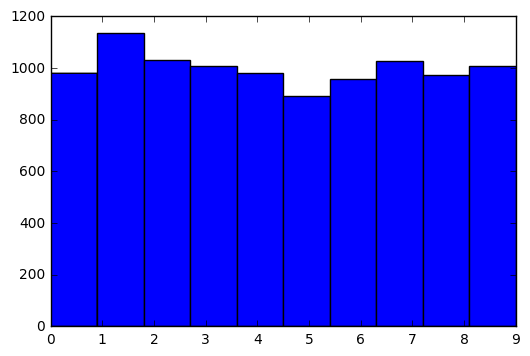

In [23]:
plt.xticks(numpy.arange(NUM_LABELS))
plt.hist(numpy.argmax(test_labels, 1));